#Topic Modeling 

In [2]:
import pandas as pd 
import numpy as np
from gensim.models import LdaMulticore, ldamodel
import gensim
import matplotlib.pyplot as plt
import re

##Loading Dataset: 

In [3]:

#load the cleaned and preprocessed dataset 
ArNews_df_update = pd.read_csv("/Users/AlaAlBinSaleh/Desktop/Desktop/Capstone/ArNews_df_Cleaned.csv", index_col=[0])

#Topic Modeling

##Text Transformation:

In [4]:
corpus=[]
word=[]

for i in range(len(ArNews_df_update['Detokenize'])):
        word =ArNews_df_update['Detokenize'].iloc[i]
        corpus.append(word)

In [5]:
texts = [[word for word in str(document).lower().split()]for document in corpus]

In [7]:
#create a dictionary 
from gensim import corpora
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(45199 unique tokens: ['أضف', 'ابن', 'اخر', 'اذ', 'اضة']...)


In [16]:
#bag of words 
corpus = [dictionary.doc2bow(text) for text in texts]
#corpus

In [9]:
#create the LDA model 
#set the number of topics to 10:
lda = gensim.models.LdaModel(corpus, id2word=dictionary, num_topics=10)

In [10]:
#print topics and the words associated with each topic 
for idx, topic in lda.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.015*"قتل" + 0.012*"نظم" + 0.011*"يمن" + 0.010*"قوت" + 0.010*"عمل" + 0.010*"حوث" + 0.009*"سور" + 0.009*"نطق" + 0.008*"عسكر" + 0.008*"حكم"
Topic: 1 
Words: 0.013*"وزر" + 0.012*"رئس" + 0.011*"دول" + 0.010*"سعد" + 0.010*"شرك" + 0.010*"طقة" + 0.009*"جلس" + 0.009*"عمل" + 0.009*"جدد" + 0.008*"ملك"
Topic: 2 
Words: 0.025*"جمع" + 0.024*"عمل" + 0.009*"درس" + 0.009*"نظم" + 0.008*"طلب" + 0.008*"شكل" + 0.008*"حقق" + 0.007*"كتب" + 0.007*"حكم" + 0.006*"ثقف"
Topic: 3 
Words: 0.019*"دول" + 0.016*"اير" + 0.014*"امر" + 0.012*"تفق" + 0.011*"سيس" + 0.011*"رئس" + 0.009*"عرق" + 0.009*"تحد" + 0.008*"حكم" + 0.007*"جمع"
Topic: 4 
Words: 0.029*"لعب" + 0.027*"فرق" + 0.019*"ندي" + 0.012*"درب" + 0.012*"قدم" + 0.010*"تحد" + 0.009*"سعد" + 0.009*"وسم" + 0.009*"دور" + 0.008*"بطل"
Topic: 5 
Words: 0.016*"عمل" + 0.013*"نطق" + 0.010*"جمع" + 0.009*"خدم" + 0.009*"وزر" + 0.009*"ركز" + 0.007*"قدم" + 0.007*"طلب" + 0.007*"خلل" + 0.007*"حفظ"
Topic: 6 
Words: 0.019*"شرك" + 0.016*"سعر" + 0.015*"نسب" + 0.014*"رفع

##Evaluate The model: 

In [11]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda, corpus=corpus,texts=texts ,dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [12]:
coherence_lda

0.41254697567048

##Find Optimal Topics Number:

In [13]:
def coherence_score(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        
        coherencemodel = CoherenceModel(model=model, corpus=corpus, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [14]:
model_list, coherence_values = coherence_score(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=50, step=5)

In [15]:
x = range(2, 50, 5)
for num, cv in zip(x, coherence_values):
    print("topic number:", num, " , coherence score", cv)

topic number: 2  , coherence score 0.33077148549160174
topic number: 7  , coherence score 0.38044769064363876
topic number: 12  , coherence score 0.4043837697586528
topic number: 17  , coherence score 0.42527727035960905
topic number: 22  , coherence score 0.4332308294832574
topic number: 27  , coherence score 0.43453475929000096
topic number: 32  , coherence score 0.4351698422263201
topic number: 37  , coherence score 0.43725011406527564
topic number: 42  , coherence score 0.43555811344936196
topic number: 47  , coherence score 0.4230625779383904


###plot the optimal Topic number 

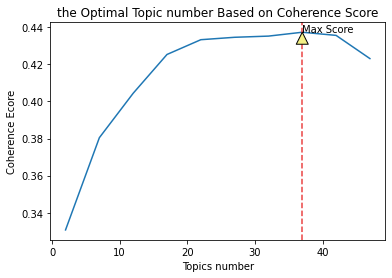

In [65]:
plt.plot(x, coherence_values)
plt.xlabel("Topics number")
plt.ylabel("Coherence Ecore")
plt.title("the Optimal Topic number Based on Coherence Score")
plt.annotate("Max Score", xy=(37, 0.43725),
            arrowprops=dict(facecolor='#F3F085', shrink=1))
plt.axvline(x=37, color='#EA4141', linestyle='--')